In [20]:
import torch
import sklearn
import numpy
import matplotlib.pyplot as plt
import random
def set_seed(seed=42): #Make sure its reproducible by making sure the RNG generates a predefined pattern
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    numpy.random.seed(seed)
    random.seed(seed)

# Call the function
set_seed(42)

In [21]:
from IPython.display import HTML
HTML("""
<style>
.reveal { font-size: 24px; }
.reveal pre { font-size: 18px; }
div.rise-enabled .reveal .rendered_html {
    font-size: 36px !important;
}
</style>
""")

# Introduction to Neural Networks: Zero to Hero

                        Warren Low

# Recent News

<img src="https://chatdeepseeks.com/wp-content/uploads/2025/01/Chat-with-DeepSeek-AI-on-chat.deepseek.com_-1024x551.webp" style="width:1200px">



# AI can generate songs
![udio](resources/udio.png)

# AI can generate videos!

![Sora](resources/sora.png)

# Why ML/DL
- <span style="font-size: 24px;">In recent years, deep learning has been useful to solve and automate novel problems</span>

# Solving CTFs

<img src="resources/ctf.png" style="width:1200px">

# Solving SWE problems

<img src= resources/swe.png style= "width: 1200px">

# Basics
- <span style="font-size: 24px;">AI is generally defined as a data driven way to solve problems</span>
- <span style="font-size: 24px;">Recap to O/A-levels</span>
    - <span style="font-size: 24px;">Y = mx+c</span>
    -  <span style="font-size: 24px;">Use a best fit line to draw conclusions</span>

![reg](resources/regression.png)

# Basics -> ML
- <span style="font-size: 36px;">ML uses the same idea!</span>
- <span style="font-size: 36px;">Simplest form of ML -> Linear regression</span>
- <span style="font-size: 36px;">ML in essence is the ability to train models to fit on data</span>
- <span style="font-size: 36px;">Then predict for unseen data</span>

# Average ML Pipeline

<img src="https://static.designandreuse.com/img20/20230306c_1.jpg" style="width: 1000px;"/>

# Neural Networks are Bob the Builder
- <span style="font-size: 24px;">It is the quintessential block of deep learning</span>
    - <span style="font-size: 24px;">LLMs, image generation, video generation, text to speech and so much more!</span>
 



- <span style="font-size: 24px;">Why are they used so much?</span>
    - <span style="font-size: 24px;">Can train on all kinds of data (LIDAR, images, text, audio)</span>
    - <span style="font-size: 24px;">Can be trained for all kinds of tasks! (Detect Object, generate images, audio, text, face recognition)</span>

<img src=resources/tasks.png style="width: 900px;"/>

# Neuron (Part 1)
- <span style="font-size: 28px;">A linear equation</span>
- <span style="font-size: 28px;">Y = **m**x+**c**</span>
- <span style="font-size: 28px;">Notation: m is W and c is B</span>
- <span style="font-size: 28px;">M and c are **parameters** the neuron tries to find to get the best fit line</span>
- <span style="font-size: 28px;">The neuron will keep on updating M and c to get the best result</span>
- <span style="font-size: 28px;">Ignore $\sigma$(z) for now we'll go through that later</span>


<img src="resources/neuron.png" style="width:1200px">


# Visualisation of Neural Networks

<span style="font-size: 24px;">Before we head into anything more complicated, let's start with visualising how the flow of a neuron goes</span>



<img src="resources/linreg.png" style ="width: 1200px;"/>

# Neuron as matrices
- <span style="font-size: 24px;">Realise that there are many x and w's in the previous image</span>
- <span style="font-size: 24px;">We can probably do a nested for loop (Slow!)</span>
- <span style="font-size: 24px;">If we turn everything into matrices, it is way faster</span>
- <span style="font-size: 24px;">In AI, we use a more general matrix called a Tensor</span>


<img src="resources/matrix.png" style="height:600px;">

# What is a Tensor?
- <span style="font-size: 24px;">n dimesnional matrix</span>
- <span style="font-size: 24px;">Basic building block that is fed into neurons</span>
- <span style="font-size: 24px;">Data is usually converted into tensors before we can work with Pytorch</span>

<img src = https://miro.medium.com/v2/resize:fit:1400/1*6Z892ClZGon03_Mawj4Pew.png/ style="height:600px">

In [2]:
#Exercise 1: Let's make our first neuron!
import torch.nn as nn

neuron = nn.Linear(1,1) #Takes in 1 value and outputs 1 value

inp = torch.tensor([30.0]) #inp for our tensor: A Tensor is like a n-dimensional matrix

out = neuron(inp) #We feed the input into our neuron to get y, the output (inside it applies mx+c)
print("Output is:",out.item())

## Let's also print our weights and biases
print("Weight:",neuron.weight.item()) 
print("Bias:",neuron.bias.item())
#Manually verifying if y=mx+c is correct
print("Y = mx+c:",neuron.weight.item() * inp.item() + neuron.bias.item())


    

Output is: 23.766162872314453
Weight: 0.7645385265350342
Bias: 0.8300079107284546
Y = mx+c: 23.76616370677948


In [3]:
### Bonus 1: Just to illustrate the use of matrices/tensors

inp = torch.rand(5,5) #Generate 5 examples with 5 values
print("Shape:", inp.shape) #Tells us the dimensions of the tensor/matrix
print("Input:")
print(inp)

#The neuron below 
new_neuron = nn.Linear(5,1) #Observe that it can take 5 examples in parallel as well
out = new_neuron(inp) #Feed the input into our neuron
print("Output:")
print(out)
print()

### Weights and biases should now be tensors also
print("Weight:",new_neuron.weight, end="\n\n")
print("Bias:",new_neuron.bias) #Notice that the bias is still onve value: That' because the same bias is used for the whole layer


Shape: torch.Size([5, 5])
Input:
tensor([[0.3829, 0.9593, 0.3904, 0.6009, 0.2566],
        [0.7936, 0.9408, 0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411, 0.4294, 0.8854],
        [0.5739, 0.2666, 0.6274, 0.2696, 0.4414],
        [0.2969, 0.8317, 0.1053, 0.2695, 0.3588]])
Output:
tensor([[ 0.2556],
        [ 0.2647],
        [-0.3548],
        [-0.1337],
        [ 0.2265]], grad_fn=<AddmmBackward0>)

Weight: Parameter containing:
tensor([[-0.2689,  0.0422, -0.4417,  0.4039, -0.3799]], requires_grad=True)

Bias: Parameter containing:
tensor([0.3453], requires_grad=True)


# How can we train AI models?

- <span style="font-size: 24px;">A good analogy for training is like studying for exams: We do assignments, and check the answer key to deepen our understanding</span>
- <span style="font-size: 24px;">Similarly, we have both a "homework" and "corrections" phase for AI</span>

![study](https://www.teachhub.com/wp-content/uploads/2020/06/How-Much-Homework-is-Too-Much.jpg)

# Forward and Backward Passes
- <span style="font-size: 24px;">So let's demystify these terms, and even learn to implement them in Pytorch!</span>
- <span style="font-size: 24px;">Forward pass: We send the inputs into the neural network, and it predicts an answer (doesn't matter if its the wrong answer)</span>
    - <span style="font-size: 24px;">We then find out how "far away" our predictions are from the actual outputs (This is called the loss)</span>
- <span style="font-size: 24px;">Backward pass: Now that we know how wrong our model is, we can update our model (WARNING: alot of math :(( )</span>

![fwd](https://miro.medium.com/v2/resize:fit:1400/1*J-v2B6T9RKxdvwThtQ1NVg.png)

In [4]:
#Exercise 2: Forward pass
neuron = nn.Linear(3,1)

inp = torch.rand(3,3)
print(neuron(inp)) # Hold up! You might have seen this just now -> This is actually the forward pass

# Notice that there's a grad_fn -> That'll be used for later (hint hint: differentiation)

tensor([[0.1950],
        [0.3361],
        [0.1334]], grad_fn=<AddmmBackward0>)


# Loss

- <span style="font-size: 24px;">We need to find out how correct or wrong these values are, compared to the correct answer</span>
- <span style="font-size: 24px;">We use math formulas to calculate a distance (Mean Square Error, Mean Absolute Error, etc.)</span>
- <span style="font-size: 24px;">This distance is called the loss -> Useful for evaluating how good or bad your AI is!</span>
- <span style="font-size: 24px;">We want to minimize this distance</span>
- ![img](https://www.js-craft.io/wp-content/uploads/2023/03/javascript-neuronal-networks-train.webp)

# Backward Pass and Gradient Descent

<div style = "font-size:24px;">
    
- In AI, we are trying to minimize the distance between our predicted answer and the correct answer
- Where have we learnt that before -> Differentiation
- Minimum values -> dy/dx = 0

- We are using the same intuition here to minimize the loss (distance) w.r.t **each parameter**
- So we are going to do differentiation for every m and c
- And push each m and c towards a value which minimizes the loss¶

This specific algorithm is called gradient descent
</div>

![gd](https://mlpills.dev/wp-content/uploads/2022/10/CaIB7lz-h.jpg)

# Gradient Descent Explained Simple
<div style = "font-size:24px;">
    
- Let's say I only have 2 parameters for a single neuron
    - m and c
- Once I calculate my loss, L
- I will need to find the error caused by m/c w.r.t L
    
- So dL/dw and dL/dc
- The issue with this is that, I have two variables in y = mx+c (m and c)
- Use **partial differentiation**
    - This just means ignore all other variables: For $\delta$L/$\delta$m, c is treated as a constant
    - Once I get this value, then I will just subtract it away from m/c
        - Why?
        - This value is the "error", so we subtract it to bring m/c closer to the optimal value
</div>

In [5]:
# Simple backward pass for L = y**2 +5
# First, convert L in terms of m and c
# L = (mx+c)**2 +5
# L = (mx**2) +mcx +5 + c**2
#Differentiate partially wrt m: 2mx**2 + cx
#Differentiate partially wrt c: mx + 2c
w = 3
c = 2
x = 10
dLdw = 2*w*(x**2) + c*x #2mx**2+cx
dLdc = w*x+2*c #mx+2c
w-=dLdw
c-=dLdc
print("New value of w:",w)
print("New value of c",c)

New value of w: -617
New value of c -32


In [6]:
#Implementing Backward Pass

#In Pytorch, everything has been hidden away so it looks simple

#Let us define our questions and answer key
neuron = nn.Linear(1,1)
question = torch.linspace(0, 1, 10).reshape(-1, 1)  
answers = question + 0.1  # Diagonal line with small offset

loss_metric = torch.nn.MSELoss() #This just means: Use Mean Square Error to find out how wrong my AI model is
optimizer = torch.optim.SGD(neuron.parameters(), lr = 0.65) #This just means -> Use gradient descent to get to the correct answer

ITERATIONS = 10
gradients = []
y_intercepts = []

for i in range(ITERATIONS):
    gradients.append(neuron.weight.item())
    y_intercepts.append(neuron.bias.item())
    optimizer.zero_grad() #Reset the optimizer to zero (If this is not done, we will accumulate the values from previous loop too)
    preds = neuron(question)
    loss = loss_metric(preds,answers)
    print("Loss of neuron:",loss.item())
    loss.backward()
    optimizer.step()



    
    


Loss of neuron: 0.03574219346046448
Loss of neuron: 0.02029207907617092
Loss of neuron: 0.012703734450042248
Loss of neuron: 0.008667001500725746
Loss of neuron: 0.006303602363914251
Loss of neuron: 0.004780808929353952
Loss of neuron: 0.0037182613741606474
Loss of neuron: 0.002933587646111846
Loss of neuron: 0.0023328810930252075
Loss of neuron: 0.0018631605198606849


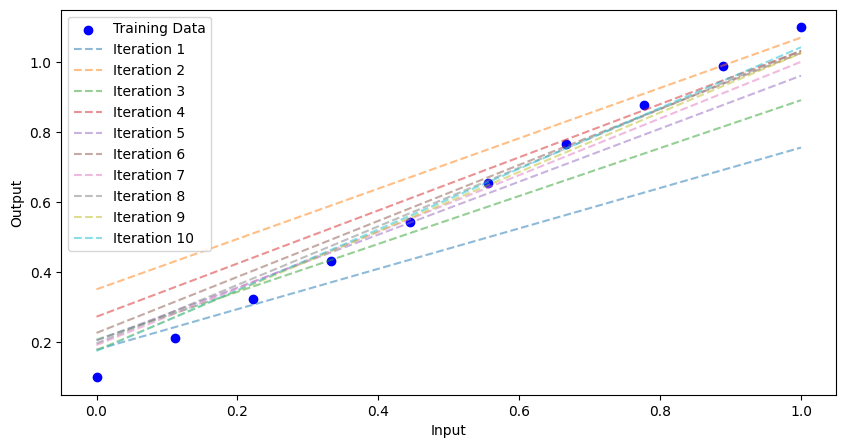

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

# Scatter plot of questions and answers
ax.scatter(question, answers, c='blue', label='Training Data')

# Plot lines for each iteration
x = numpy.linspace(min(question), max(question), 100)
for i in range(ITERATIONS):
   y = gradients[i] * x + y_intercepts[i]
   ax.plot(x, y, '--', alpha=0.5, label=f'Iteration {i+1}')

ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.legend()
plt.show()

# However, a big problem with a single neuron
<div style = "font-size:24px;">

- It's only a best fit line
- How do we fit more complicated data
    - Real world patterns are really noisy!
</div>

![curve](resources/curve.png)

# Example of Real World Data: MNIST

<div style = "font-size:24px;">

- Given data of pictures of digits from 0 to 9, can we predict the number in text?
- This is a classification task: It should know how to classify a digit from 0 to 9 based on the image
- Classification vs best fit line (Regression):

    - In regression, you are trying to predict a continuous value (from 0 to infinity)
    - In classification, you try to predict a class (Given numbers from 0 to 9, dog or cat or mouse, etc...)
    
- For example:

![img](https://rasbt.github.io/mlxtend/user_guide/data/mnist_data_files/mnist_data_10_0.png)

Our AI should predict 0
</div>

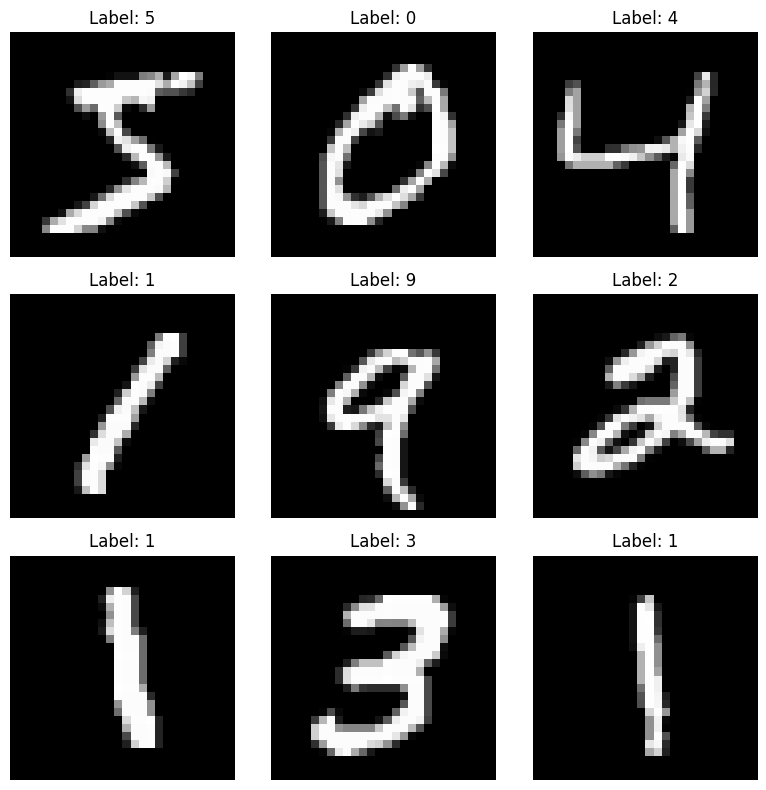

In [8]:
# Exercise 2: Let's introduce a toy problem to slowly solve now!

#MNIST: Modified National Institute of Standards and Technology database
# Given a picture of a number -> Can we predict the number in text?

from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load MNIST
#transform = transforms.ToTransform()
import struct


def read_idx(filename):
   with open(filename, 'rb') as f:
       zero, data_type, dims = struct.unpack('>HBB', f.read(4))
       shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
       return numpy.frombuffer(f.read(), dtype=numpy.uint8).reshape(shape)

# Load data
X_train = read_idx('data/train-images.idx3-ubyte')
y_train = read_idx('data/train-labels.idx1-ubyte')

# Convert to torch tensors
X_train = torch.from_numpy(X_train.copy()).float()
y_train = torch.from_numpy(y_train.copy()).long()

# Normalize images
X_train = X_train / 255.0
# Plot first 9 images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
   img, label = X_train[i],y_train[i]
   ax.imshow(img.squeeze(), cmap='gray')
   ax.axis('off')
   ax.set_title(f'Label: {label}')

plt.tight_layout()
plt.show()

In [9]:
# Let's try using a single neuron
import torch.nn.functional as F
print(X_train.shape) #See that its a 3D tensor (a list of 2d matrices)

mnist_neuron = nn.Linear(784,10)

#Interesting thing about linear: It can only take in vectors or matrices! It can't take a 3D tensor (A bunch of matrices together)
#So we need to expand/flatten each image into a 28*28=784 vector, so that we can feed in all the images at once!
#Our neuron will take a matrix of (60000, 784) 

X_train = X_train.view(-1, 28*28)
X_train.contiguous()

print(X_train.shape)

loss_fn = nn.CrossEntropyLoss() # Think of this as a magical function that checks if you predicted the correct class
optimizer = torch.optim.Adam(mnist_neuron.parameters())

EPOCHS = 150 #What is an epoch? It is one cycle of training on the entire dataset (60,000 images)

for epoch in range(EPOCHS):
    optimizer.zero_grad()
    preds = mnist_neuron(X_train)
    loss = loss_fn(preds, y_train)
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(preds.data, 1)  # Get the class with highest probability
    correct = (predicted == y_train).sum().item()
    accuracy = correct / len(y_train)
    print("Loss:",loss.item())
    print(f"Accuracy: {accuracy * 100: .2f}")

#On GPU, this might break -> Why? GPU memory is more limited




torch.Size([60000, 28, 28])
torch.Size([60000, 784])
Loss: 2.2967987060546875
Accuracy:  12.13
Loss: 2.243772506713867
Accuracy:  20.61
Loss: 2.192486047744751
Accuracy:  30.39
Loss: 2.142848253250122
Accuracy:  40.55
Loss: 2.0947678089141846
Accuracy:  48.51
Loss: 2.0481555461883545
Accuracy:  53.97
Loss: 2.00293231010437
Accuracy:  57.65
Loss: 1.9590309858322144
Accuracy:  60.66
Loss: 1.9163951873779297
Accuracy:  62.83
Loss: 1.8749725818634033
Accuracy:  64.83
Loss: 1.8347173929214478
Accuracy:  66.36
Loss: 1.7955869436264038
Accuracy:  67.66
Loss: 1.7575424909591675
Accuracy:  68.77
Loss: 1.7205501794815063
Accuracy:  69.86
Loss: 1.6845818758010864
Accuracy:  70.81
Loss: 1.6496148109436035
Accuracy:  71.63
Loss: 1.6156309843063354
Accuracy:  72.41
Loss: 1.582617998123169
Accuracy:  73.15
Loss: 1.5505672693252563
Accuracy:  73.77
Loss: 1.5194724798202515
Accuracy:  74.34
Loss: 1.4893279075622559
Accuracy:  74.91
Loss: 1.460127353668213
Accuracy:  75.39
Loss: 1.4318630695343018
Accur

# Can we just stack neurons together?
<div style = "font-size:24px;">
    
- Not really -> Remember that each neuron so far is just a linear equation
- If we just stack neurons, we are just creating another line (Line + Line = another line)
- Known as collapse
</div>

![collapse](resources/collapse.png)

## Mathematical Proof

$$y = m_1(m_2x + c_2) + c_1$$
$$y = m_1m_2x + c_2m_1 + c_1$$
$$m_3 = m_1m_2 and c_3 = c_2m_1 + c_1$$
$$y = m_3x +c_3$$

# We need non linearity
<div style = "font-size:24px;">

- That is the only way we can transform our lines into curves and more complicated shapes to fit more difficult data
- These non linear functions are known as activation functions

</div>

# Activation functions

![act](resources/act.png)


# Where do we put these activation functions?
<div style = "font-size:24px;">

- Right after each neuron
- This is to turn the linear outputs into more robust non linear outputs
</div>

![active](resources/active.png)



In [10]:
# Exercise 3:
# Let's create our first MLP: MultiLayer Perceptron

class MLP(nn.Module): #nn.Module is like a container (It stores multiple layers of neurons, and you have full control on how to do the forward pass)
    def __init__(self):
        super().__init__() #Initialise the parent class, so that everything works properly
        self.layer1 = nn.Linear(784, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128,64)
        self.layer5 = nn.Linear(64,10)
        self.act = nn.ReLU()
    def forward(self, x): #With multiple layers, you need to define the order you feed the input in
        x = self.layer1(x)
        x = self.act(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.relu(x)
        x = self.layer4(x)
        x = F.relu(x)
        out = self.layer5(x)
        return out


model = MLP() #Call your model
X_train = X_train.view(-1, 28*28)
X_train.contiguous()


loss_fn = nn.CrossEntropyLoss() # Think of this as a magical function that checks if you predicted the correct class
optimizer = torch.optim.Adam(model.parameters())

EPOCHS = 150 #What is an epoch? It is one cycle of training on the entire dataset (60,000 images)

for epoch in range(EPOCHS):
    optimizer.zero_grad()
    preds = model(X_train)
    loss = loss_fn(preds, y_train)
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(preds.data, 1)  # Get the class with highest probability
    correct = (predicted == y_train).sum().item()
    accuracy = correct / len(y_train)
    print("Loss:",loss.item())
    print(f"Accuracy: {accuracy * 100: .2f}")
        

Loss: 2.3066341876983643
Accuracy:  9.75
Loss: 2.296251058578491
Accuracy:  9.75
Loss: 2.284046173095703
Accuracy:  9.75
Loss: 2.2667410373687744
Accuracy:  12.14
Loss: 2.2421061992645264
Accuracy:  18.44
Loss: 2.206838846206665
Accuracy:  30.59
Loss: 2.1570682525634766
Accuracy:  37.19
Loss: 2.0892579555511475
Accuracy:  39.30
Loss: 2.002218723297119
Accuracy:  43.45
Loss: 1.8972233533859253
Accuracy:  47.32
Loss: 1.7780307531356812
Accuracy:  50.31
Loss: 1.6484909057617188
Accuracy:  54.53
Loss: 1.5132883787155151
Accuracy:  58.43
Loss: 1.3780251741409302
Accuracy:  61.77
Loss: 1.2484240531921387
Accuracy:  67.34
Loss: 1.1328932046890259
Accuracy:  71.34
Loss: 1.030533790588379
Accuracy:  71.98
Loss: 0.9417275190353394
Accuracy:  72.66
Loss: 0.8685654997825623
Accuracy:  73.41
Loss: 0.8075322508811951
Accuracy:  75.01
Loss: 0.7571350336074829
Accuracy:  75.16
Loss: 0.7201889157295227
Accuracy:  76.53
Loss: 0.7040590643882751
Accuracy:  76.14
Loss: 0.684446394443512
Accuracy:  76.74
L

# How does forward pass and gradient descent work for multiple layers?
<div style = "font-size:24px;">

- Almost the same!
- Slight modification for backward pass

</div>

# Forward Pass Illustration

![forward](resources/unnamed.gif)

# How does backpropagation work?
<div style = "font-size:24px;">

- Look at the structure of the neural network
- Observe that we need to calculate the input m and c **w.r.t loss**
- We need to expand everything just to do that differentiation
- Because of this, if we start doing gradient descent from the input, it will be very messy and complicated
- We need to start from the back: Hence, backpropagation
</div>



# How does backpropagation work?
<div style = "font-size:24px;">

- Using the gradient descent, we are going to work from the back
- Calculate the m and c for the layer closest to the output
- Work our way backwards

- Why should this make sense:
    - Working backwards means we can more easily isolate and update the parameters without worrying about how the neurons interact
    - Also mathematically easier!
    - Remember chain rule from differentiation
    - Used to make computing layers further away from the output more easy
</div>

<img src=resources/bac.gif style="width:600px">

# Backpropagation, an example

<div style = "font-size:24px;">

- Suppose we have $\delta$L/$\delta w_n$, and $\delta$L/$\delta b_n$, the final layer's weights and biases
- If I want to go update the layer before it, I require $\delta$ L/$\delta w_{n-1}$
- This might be very difficult to compute
- I can find $\delta w_n/\delta w_{n-1}$ -> Easier as they are directly connected
- Then I can use chain rule to find dL/d$w_{n-1}$

</div>

# Evals:

<div style = "font-size:24px;">

- Be careful of the results mentioned here
- Might only be for the current dataset
- It might fail on data not seen before (Does not generalise well)
- Therefore we always have a test set

</div>

# Overfitting and Underfitting

<div style = "font-size:24px;">

- Overfitting: It does better in training data but fails test data badly
- Underfitting: It just doesn't learn
</div>

 ![overfit](https://www.mathworks.com/discovery/overfitting/_jcr_content/mainParsys/image.adapt.full.medium.svg/1718273106637.svg)
 

In [15]:
#Let's try using our models on the test data

X_test = read_idx('data/t10k-images.idx3-ubyte')
y_test = read_idx('data/t10k-labels.idx1-ubyte')

# Convert to torch tensors 
X_test = torch.from_numpy(X_test.copy()).float()
y_test = torch.from_numpy(y_test.copy()).long()

# Normalize & flatten
X_test = X_test / 255.0
X_test = X_test.view(-1, 28*28)


# Test accuracy
@torch.no_grad() #Tells model not to store gradients because we are just inferencing
def test_model(model, X, y):
   with torch.no_grad():
       preds = model(X)
       _, predicted = torch.max(preds.data, 1)
       correct = (predicted == y).sum().item()
       accuracy = correct / len(y)
       return accuracy * 100

# Test single neuron
print("Single Neuron Test Accuracy: {:.2f}%".format(test_model(mnist_neuron, X_test, y_test))) 

# Test MLP
print("MLP Test Accuracy: {:.2f}%".format(test_model(model, X_test, y_test)))

Single Neuron Test Accuracy: 88.76%
MLP Test Accuracy: 90.55%


Model Accuracy: 90.55%


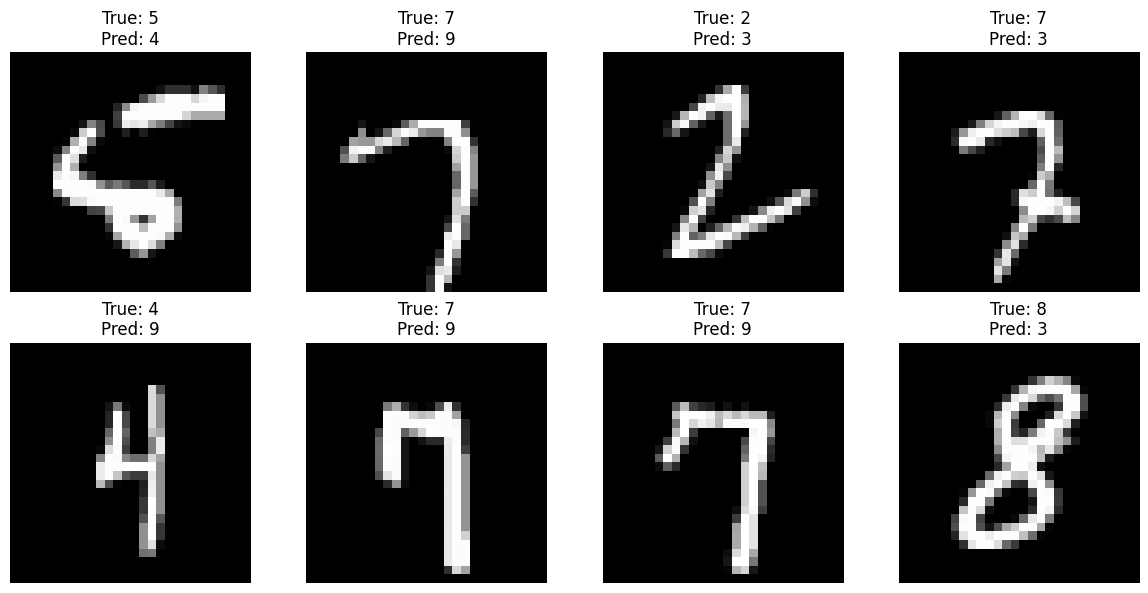

In [19]:
# It's best to also view what examples were wrong

@torch.no_grad()
def find_mistakes(model, X, y):
    model.eval()
    preds = model(X)
    _, predicted = torch.max(preds.data, 1)
    
    # Find misclassified examples
    mistakes_mask = predicted != y
    mistakes_X = X[mistakes_mask]
    mistakes_y_true = y[mistakes_mask]
    mistakes_y_pred = predicted[mistakes_mask]
    
    accuracy = (predicted == y).sum().item() / len(y) * 100
    
    return accuracy, mistakes_X, mistakes_y_true, mistakes_y_pred

def plot_mistakes(mistakes_X, true_labels, pred_labels, num_images=8):
    # Create subplot grid (2 rows x 4 columns)
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.ravel()  # Flatten axes array for easier indexing
    
    # Plot up to num_images mistakes
    for idx in range(min(num_images, len(mistakes_X))):
        # Get image and remove channel dimension for plotting
        img = mistakes_X[idx].reshape(28,28)
        
        # Plot image
        axes[idx].imshow(img, cmap='gray')
        axes[idx].axis('off')
        axes[idx].set_title(f'True: {true_labels[idx].item()}\nPred: {pred_labels[idx].item()}')
    
    plt.tight_layout()
    plt.show()

# Usage:
accuracy, mistakes_X, true_labels, pred_labels = find_mistakes(model, X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}%")
plot_mistakes(mistakes_X, true_labels, pred_labels)

# How to setup GPU on google colab

1) Click "Connect" on the top right corner
![connect](resources/connect.png)
2) Click "Change Runtime Type"
3) Set GPU
![gpu](resources/runtime.png)


In [12]:
## Bonus 2: Batching and running on GPU and other cool tricks

# Sometimes training a neural network can be very slow

#Can we do some methods to speed up training?
import time
#1 Run on GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu' #Checks if GPU present
##Create a dataset for these values (Originally we didn't have to, but the torchvision MNIST is down)
from torch.utils.data import Dataset, DataLoader

class MNISTDataset(Dataset): # A dataset is a collection of data
    def __init__(self, X, y):
        # Normalize the data to [0, 1] range
        self.X = X / 255.0
        # Add channel dimension (MNIST is grayscale)
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx): #Gets next item
        reshaped_X = self.X[idx].view(28*28)
        reshaped_X.contiguous()
        return reshaped_X, self.y[idx]

# Create dataset
mnist_dataset = MNISTDataset(X_train, y_train)

# Create dataloader
batch_size = 32 # A batch is how many images to retrieve at any time
train_loader = DataLoader(
    mnist_dataset,
    batch_size=batch_size,
    shuffle=True,  # Shuffle the data for training
    num_workers=2  # Number of subprocesses for data loading
)

# We use a batch because GPU memory tends to be limited, so it can't fit all 60,000 images for larger networks
model = MLP().to(device) #This tells the program to send the model to GPU if available 
#Optimization 2:
#model = torch.compile(model)

# Now you can use it in training:
EPOCHS = 5
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
start = time.time()
for epoch in range(EPOCHS):
    print("Current epoch:",epoch+1)
    for batch_X, batch_y in train_loader:
        # batch_X shape: [batch_size, 1, 28, 28]
        # batch_y shape: [batch_size
        optim.zero_grad()
        batch_X = batch_X.to(device)
        batch_Y = batch_y.to(device)
        preds = model(batch_X) #We dont need to send this because its already on the GPU!
        loss = loss_fn(preds, batch_Y)
        loss.backward()
        optim.step()
end = time.time()

print("Time taken =",end-start)





Current epoch: 1
Current epoch: 2
Current epoch: 3
Current epoch: 4
Current epoch: 5
Time taken = 50.347538232803345


# Thank you

# Bonus resources: (To be explored after the worshop)

- Find out how crossentropy and softmax works
    - Crossentropy: https://medium.com/@libertihub/cross-entropy-loss-function-a-simple-explanation-for-everyone-58a27f85f69b"
    - Softmax: https://medium.com/@sue_nlp/what-is-the-softmax-function-used-in-deep-learning-illustrated-in-an-easy-to-understand-way-8b937fe13d49

  
- Try out a few different [activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
    - Sigmoid
    - Swish
    - GeLU
- Try out different [optimizers](https://pytorch.org/docs/stable/optim.html)
    - Adam
    - AdamW

- Add different layers 
    - [BatchNorm](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html)